In [17]:
from glob import glob
from os import path

DIR_CKPTs = "..//..//CHECKPOINTS//BT_1//"
checkpoint_files = glob(path.join(DIR_CKPTs, "*.pt"))
# checkpoint_files

In [31]:
from torch.nn.utils import parameters_to_vector
import torch
from tqdm import tqdm

diff_norm = []
diff_n_std = []
for idx_f, ckt_path in enumerate(tqdm(checkpoint_files, desc="Processing checkpoints")):
    model = torch.load(ckt_path)

    if idx_f == 0:
        all_params_prev = parameters_to_vector([w for w in model.values()])
        continue

    all_params = parameters_to_vector([w for w in model.values()])
    _d = all_params - all_params_prev
    diff_n_std.append(torch.std(_d).item())
    diff_norm.append(torch.norm(_d).item())

Processing checkpoints: 100%|██████████| 7469/7469 [02:10<00:00, 57.13it/s]


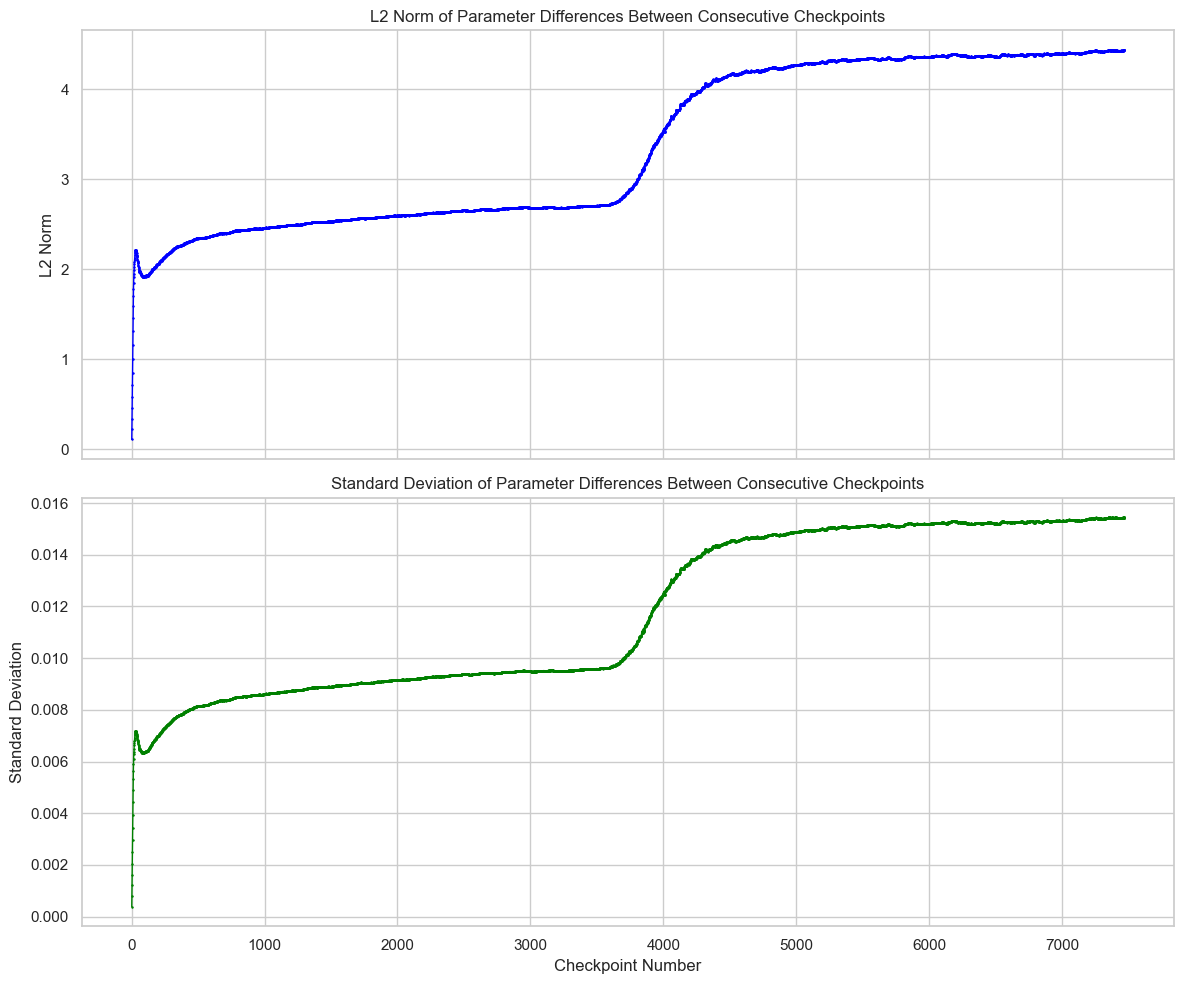

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create a dataframe for better plotting with seaborn
data = pd.DataFrame(
    {"Checkpoint": range(1, len(diff_norm) + 1), "Norm": diff_norm, "Std": diff_n_std}
)

# Set the style for prettier plots
# sns.set_theme(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot norm values
sns.lineplot(
    x="Checkpoint",
    y="Norm",
    data=data,
    ax=axes[0],
    marker=".",
    markersize=2,
    color="blue",
    linewidth=1,
    # markerfacecolor="white",  # White fill for better visibility
    markeredgecolor="blue",
)
axes[0].set_title("L2 Norm of Parameter Differences Between Consecutive Checkpoints")
axes[0].set_ylabel("L2 Norm")

# Plot standard deviation values
sns.lineplot(
    x="Checkpoint",
    y="Std",
    data=data,
    ax=axes[1],
    marker=".",
    markersize=2,
    color="green",
    linewidth=1,
    # markerfacecolor="white",  # White fill for better visibility
    markeredgecolor="green",
)
axes[1].set_title(
    "Standard Deviation of Parameter Differences Between Consecutive Checkpoints"
)
axes[1].set_ylabel("Standard Deviation")
axes[1].set_xlabel("Checkpoint Number")

# Adjust layout
# lim_low = 3_360
# lim = 4_360
# axes[0].set_xlim(lim_low, lim)
# axes[1].set_xlim(lim_low, lim)
plt.tight_layout()
plt.show()

In [64]:
37_000 / 11
# 48_000 / 11

3363.6363636363635